This Python notebook outlines the steps for performing EDA and XAI on a reduced subset of the SpotifyDataset.csv to predict song popularity.

In [45]:
# Conectar google colab con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
main_datasets_path = '/content/drive/MyDrive/LSMADEVOIR/dataset/'

## 1.  Import Libraries and Load Data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Load a sample of the SpotifyDataset.csv
data=pd.read_csv(main_datasets_path+'SpotifyDataset.csv',nrows=10000)

# Affichage des premières lignes du jeu de données
print(data.head())




  artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000 

## 2. Exploratory Data Analysis (EDA)



Data Cleaning: Check for missing values, outliers, and data inconsistencies.



In [48]:
# Check for missing values
data.isnull().sum()

# Handle missing values (e.g., impute or remove rows)

# Identify and address outliers (if necessary)


artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

Feature Analysis: Understand the distribution and relationships between features (e.g., danceability, energy, popularity).


<ipython-input-59-225b5a22e191>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


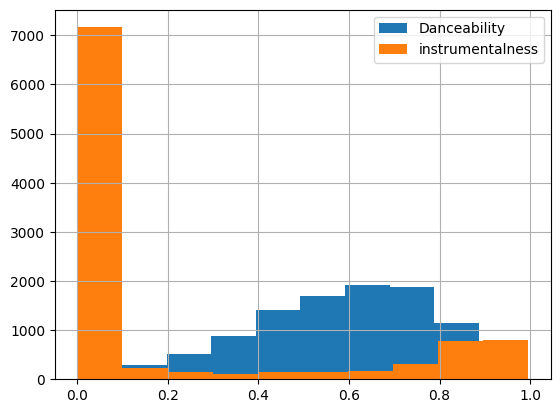

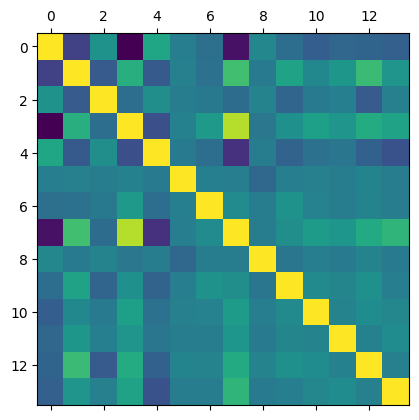

In [59]:
# Explore feature distributions with histograms or box plots
data["danceability"].hist(label="Danceability")
data["instrumentalness"].hist(label="instrumentalness")
# Calculate correlations between features
correlation_matrix = data.corr()
plt.legend()
# Visualize correlations with heatmaps
import matplotlib.pyplot as plt
plt.matshow(correlation_matrix)
plt.show()


Histogram

the x-axis represents the range of possible danceability values ( between 0 and 1), and the y-axis represents the number of songs that fall within each range.

We have a skewed distribution that's might suggest a higher concentration of songs in either high danceability categories.


and We have a skewed distribution might suggest a higher concentration of songs in either low instrumentalness feature.

Heatmap

We see that we don't really have correlation between our data

Pattern Analysis: Look for patterns between features and popularity using visualizations.


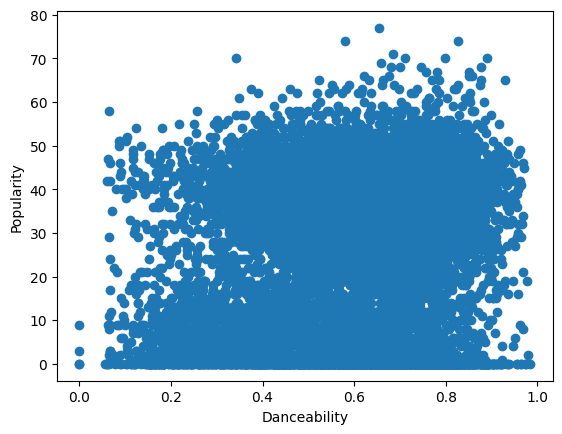

In [64]:
# Scatter plot: Popularity vs. Danceability
plt.scatter(data["danceability"], data["popularity"])
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()


Observations from the scatter plot:

There is no strong, clear correlation between danceability and popularity. This means that we cannot say for certain that a song will be more popular because it has a higher danceability score.
There are songs with high danceability that also have high popularity scores (upper right corner), but there are also songs with high danceability that have low popularity scores (scattered throughout the plot). Similarly, there are songs with low danceability that have both high and low popularity scores.
The plot suggests there may be other factors besides danceability that influence a song's popularity on Spotify.

## 3. Model Training and Evaluation


Define target variable: Set "popularity" as the target variable for prediction.
Feature selection: Choose relevant features based on EDA insights.
Train-test split: Split data into training and testing sets

In [66]:
X = data[["danceability", "energy", "instrumentalness"]]  # Adjust features
y = data["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Support Vector Regression (SVR) model
model = SVR()
model.fit(X_train, y_train)

# Evaluate model performance (e.g., R-squared)
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.1248887781970851


An R-squared of 0.1268 indicates that the model explains only about 12.68% of the variance in song popularity based on the three features chosen. This is a relatively low value, suggesting that these features alone are not very effective in predicting song popularity on Spotify.

## 4. Explainable AI (XAI)

Permutation Importance: Analyze feature importance by shuffling a feature's values and measuring the impact on model performance.

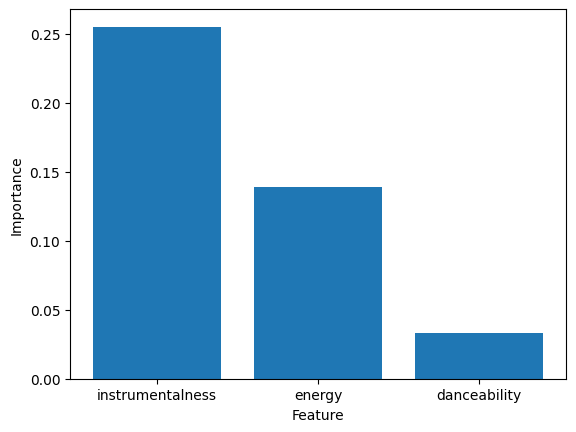

In [67]:
# Calculate permutation importance
results = permutation_importance(model, X_test, y_test)

# Sort features by importance
feature_names = X.columns
feature_importances = results.importances_mean

feature_importance_df = pd.DataFrame({"feature": feature_names, "importance": feature_importances})
feature_importance_df.sort_values(by="importance", inplace=True, ascending=False)

# Visualize feature importance (e.g., bar chart)
plt.bar(feature_importance_df["feature"], feature_importance_df["importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

We can see on the graph that instrumentalness is the most importance feature